In [624]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [625]:
train_data = pd.read_excel("Data_Train.xlsx")

In [626]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [627]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [628]:
train_data.info()
#data usage is 918+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [629]:
train_data.isnull().sum() # two features Route and Total_Stops have 1 missing value each. Since the count of missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [630]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [631]:
train_data.dropna(inplace = True)

In [632]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [633]:
#In Pandas, object is similar to string
#integer has different bit signed integers, like int16 (16 bit signed integers - has a length of 16 bits or 2 bytes, 
#meaning it uses 16 bits to store the data)
#int64>int32>int16 in terms of memory storage

In [634]:
train_data.info(memory_usage = "deep") #memory storage is 7.2 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


In [635]:
data = train_data.copy()

In [636]:
data.columns #returns a list of columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [637]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [638]:
#Calculus, Linear Algebra, Vectors never work with string data

In [639]:
data.dtypes
#Date_of_Journey, Dep_Time, Arrival_Time need to be time stamp datatypes (datetime64 types)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [640]:
def changeToTS(column):
    data[column] = pd.to_datetime(data[column])

In [641]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [642]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [643]:
for column in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    changeToTS(column)

In [644]:
data.dtypes #ns stands for nano second

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [645]:
#extracting derived attributes from date_of_journey
data['Journey_Day']= data['Date_of_Journey'].dt.day #calling day attribute
data['Journey_Month']= data['Date_of_Journey'].dt.month #calling day attribute
data['Journey_Year']= data['Date_of_Journey'].dt.year #calling day attribute


In [646]:
#making dep_time and arrival_time easier for datapreprocessing and model building

In [647]:
def extractHourMin(df, col):
    df[col+'_Hour'] = df[col].dt.hour
    df[col+'_Minute'] = df[col].dt.minute

In [648]:
extractHourMin(data, "Arrival_Time")
extractHourMin(data, "Dep_Time")

In [649]:
#Drop Arrival_Time and Dep_Time attributes
colsToDrop = ['Arrival_Time', 'Dep_Time']
data.drop(colsToDrop, axis = 1, inplace=True)

In [650]:
#Problem Statement: Analyze when most problems will take off

In [651]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute'],
      dtype='object')

In [652]:
#Design a function for Dep_Time_Hour to divide the day into morning, evening, night, and so on
def flightDepTime(x):
    if(x> 4 and x <= 8):
        return "Early Morning"
    if (x > 8 and x <= 12):
        return "Morning"
    if (x > 12 and x <= 16):
        return "Afternoon"
    if (x > 16 and x <= 20):
        return "Evening"
    if (x > 20 and x <= 24):
        return "Night"
    else:
        return "Late Night"

In [653]:
data['Dep_Time_Hour'].apply(flightDepTime).value_counts() #most flights are in early morning, followed by evening, 
#followed by morning, followed by afternoon, followed by night, and finally followed by late night

Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1040
Late Night        465
Name: Dep_Time_Hour, dtype: int64

<AxesSubplot:>

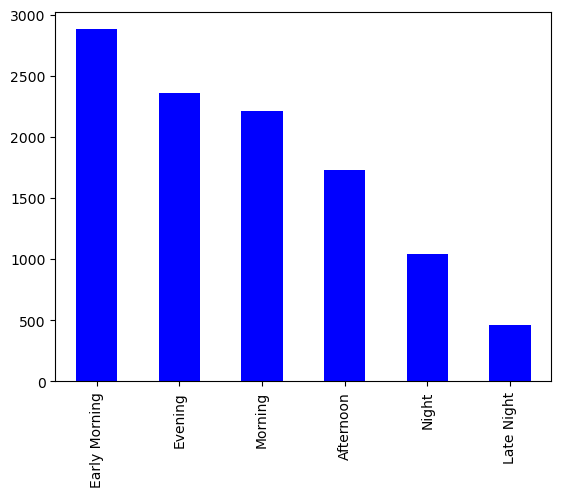

In [654]:
#Simple plot
data['Dep_Time_Hour'].apply(flightDepTime).value_counts().plot(kind = "bar", color = "blue")

In [655]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [656]:
import plotly 
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs #we want this plot in the Jupyter notebook, which is why we want it offline as well
#plot creates static chart, iplot creates interactive javascript plot
init_notebook_mode(connected = True)
cf.go_offline()

In [657]:
data['Dep_Time_Hour'].apply(flightDepTime).value_counts().iplot(kind = "bar")

In [658]:
#Making Duration feature ready for data analysis and model building - Each row should have the format 'xh Ym'
def preProcessDuration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [659]:
data['Duration'] = data['Duration'].apply(preProcessDuration)

In [660]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x. split(" ")[0][0:-1]))
data['Duration_Minutes'] = data['Duration'].apply(lambda x: int(x. split(" ")[1][0:-1]))

In [661]:
#Let's analyze whether duration impacts the price or not (could use scatterplot to tell the relationship between both the continuous features and also gives the best fit line)
data['Duration_Total_Minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [662]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Duration_Total_Minutes'],
      dtype='object')

<AxesSubplot:xlabel='Duration_Total_Minutes', ylabel='Price'>

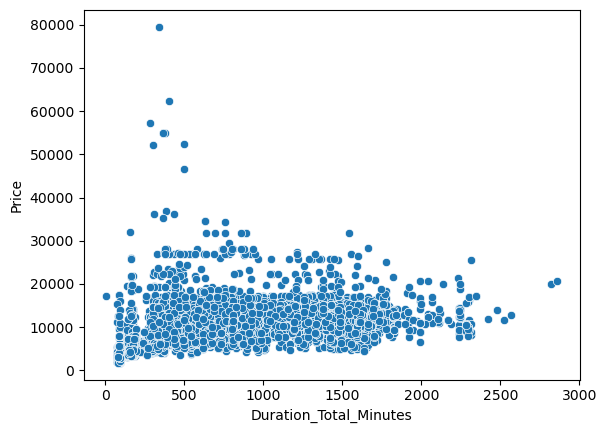

In [663]:
sns.scatterplot(x = 'Duration_Total_Minutes', y = 'Price', data = data)


<AxesSubplot:xlabel='Duration_Total_Minutes', ylabel='Price'>

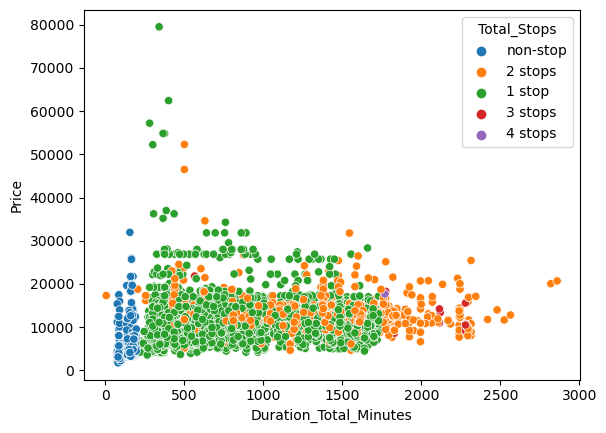

In [664]:
#use hue parameter to show the differences between stops
sns.scatterplot(x = 'Duration_Total_Minutes', y = 'Price', hue = 'Total_Stops', data = data)
#as number of stops increases, duration increases and price also increases

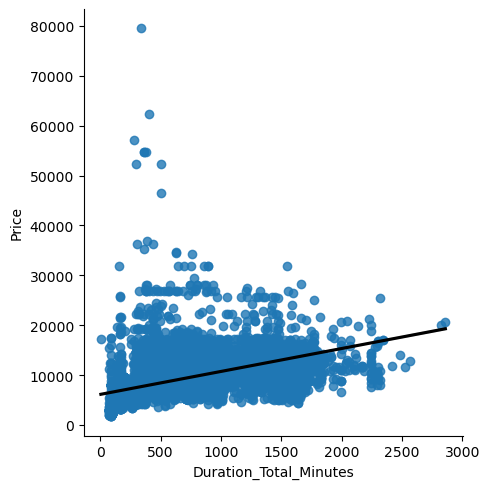

In [665]:
sns.lmplot(x = 'Duration_Total_Minutes', y = 'Price', data = data, line_kws = {'color': 'black'})
#as duration increases, price also increases

In [666]:
#On which route is each airline used the most?
#Airline vs Price analysis
airlines = data['Airline'].unique().tolist()
airlines

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [667]:
from collections import Counter
for i in airlines:
    countRoute = data[data['Airline'] == i].groupby('Route').size().sort_values(ascending = False)
    countRouteDict = countRoute.to_dict()
    RouteCounter = Counter(countRouteDict)
    MostCommonRoute = RouteCounter.most_common(5)
    print(i)
    for key, val in MostCommonRoute:
        print('Route:', key)

IndiGo
Route: BLR → DEL
Route: CCU → BLR
Route: DEL → BOM → COK
Route: DEL → HYD → COK
Route: BOM → HYD
Air India
Route: BLR → DEL
Route: DEL → BOM → COK
Route: BOM → HYD
Route: DEL → MAA → COK
Route: DEL → COK
Jet Airways
Route: CCU → BOM → BLR
Route: DEL → BOM → COK
Route: BLR → BOM → DEL
Route: BLR → DEL
Route: CCU → DEL → BLR
SpiceJet
Route: CCU → BLR
Route: BLR → DEL
Route: MAA → CCU
Route: BOM → HYD
Route: DEL → MAA → COK
Multiple carriers
Route: DEL → BOM → COK
Route: DEL → HYD → COK
Route: DEL → HYD → MAA → COK
Route: DEL → IDR → BOM → COK
Route: DEL → IXU → BOM → COK
GoAir
Route: BLR → DEL
Route: DEL → BOM → COK
Route: DEL → AMD → COK
Route: CCU → AMD → BLR
Route: CCU → BOM → BLR
Vistara
Route: CCU → DEL → BLR
Route: BLR → DEL
Route: DEL → COK
Route: MAA → CCU
Route: BOM → DEL → HYD
Air Asia
Route: CCU → BLR
Route: BLR → DEL
Route: DEL → BLR → COK
Route: CCU → DEL → BLR
Route: CCU → BBI → BLR
Vistara Premium economy
Route: BLR → DEL
Route: MAA → CCU
Jet Airways Business
Route:

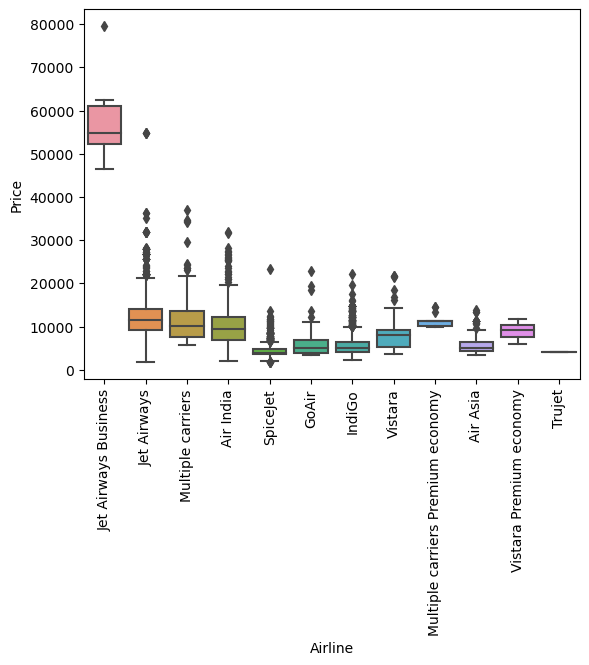

In [668]:
#Airline vs Price Analysis
sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))
plt.xticks(rotation = 'vertical')
plt.show()

In [669]:
#Apply one hot encoding (feature engineering technique) on the data
category_column = [col for col in data.columns if data[col].dtype == 'object']
numerical_column = [col for col in data.columns if data[col].dtype != 'object']

In [670]:
for subcategory in data['Source'].unique():
    data['Source'+'_'+subcategory]=data['Source'].apply(lambda x: 1 if x==source else 0) #manual one hot encoding


In [671]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Dep_Time_Hour,Dep_Time_Minute,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,0,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,0,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,0,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,0,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,0,0,0,0,0


In [672]:
data['Airline'].nunique() #number of unique values
#Unnecessary dimensions will be added to the dataframe using one hot encoding (curse of dimensionality)
#Perform target guided encoding (feature encoding in context of the target feature, which in this case is Price)

12

In [673]:
sortedPriceAirline = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [674]:
dictAirline = {key:index for index, key in enumerate(sortedPriceAirline)}
dictAirline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [675]:
data['Airline'].map(dictAirline)
data['Airline'] = data['Airline'].map(dictAirline)

In [676]:
data['Airline'] #now we have this feature in integer data type

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [677]:
data['Destination'].unique() #get new values
#Now, New Delhi and Delhi are the same. So, wherever we have New Delhi, we can replace it with Delhi
data['Destination'].replace('Delhi', 'New Delhi', inplace = True)


In [678]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [679]:
destinations = data.groupby(['Destination'])['Price'].mean().sort_values().index
destinations

Index(['Kolkata', 'Hyderabad', 'New Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [680]:
dictDest = {key:index for index, key in enumerate(destinations)}
dictDest

{'Kolkata': 0, 'Hyderabad': 1, 'New Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [681]:
data['Destination'].map(dictDest)

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [682]:
data['Destination'] = data['Destination'].map(dictDest)


In [683]:
#Perform manual encoding on data, plus remove all unnecessary features
data['Total_Stops'].unique() #This is ordinal data, which is why we will use label encoding. We can either use a simple
#sklearn package
stop = {'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
data['Total_Stops'].map(stop)
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [684]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [685]:
data.drop(columns = ['Date_of_Journey', 'Additional_Info', 'Duration_Total_Minutes', 'Source', 'Journey_Year'], axis = 1, inplace = True)

In [686]:
data.drop(columns = ['Route'], axis = 1, inplace = True)

In [687]:
data.columns

Index(['Airline', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [688]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,0,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,0,0,0,0,0
2,10,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,0,0,0,0,0


In [689]:
data.drop(columns = ['Duration'], axis = 1, inplace = True)

In [690]:
data.head(3) #data is now completely fit for the ML model after feature engineering and data cleaning 

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Time_Hour,Dep_Time_Minute,Duration_Hours,Duration_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,0,0,0,0,0
1,7,3,2,7662,5,1,13,15,5,50,7,25,0,0,0,0,0
2,10,4,2,13882,6,9,4,25,9,25,19,0,0,0,0,0,0


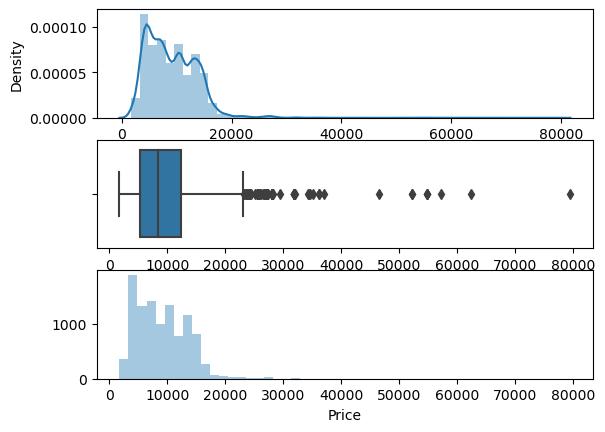

In [691]:
#Outlier detection: you can use data visualization to check if outliers exist in the data. You can check if outliers exist in 
#data using a boxplot. You can also use a histogram or even a distribution plot
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3, kde = False) #This will give you a histogram using seaborn
plot(data, 'Price')
#Since we have right-skewness in the data, we will use the IQR(inter quartile range) approach to deal with outliers. Replace
#outliers with the median of the data
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3-q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [692]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [693]:
[price for price in data['Price'] if price > maximum or price < minimum]#this will give you the outliers in the Price feature
#median serves as a middle value and mean is affected by outliers. On the other hand, the median is not affected by outliers

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26743,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 26890,
 25735,
 54826,
 26890,
 35185,
 79512,
 28097,
 27992,
 26890,
 25735,
 26092,
 31825,
 25913,
 25735,
 27992,
 31825,
 23267,
 62427,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 31825,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 27992,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 25703,
 26890,
 23528,
 31825,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 57209,
 26890,
 31825,
 26480]

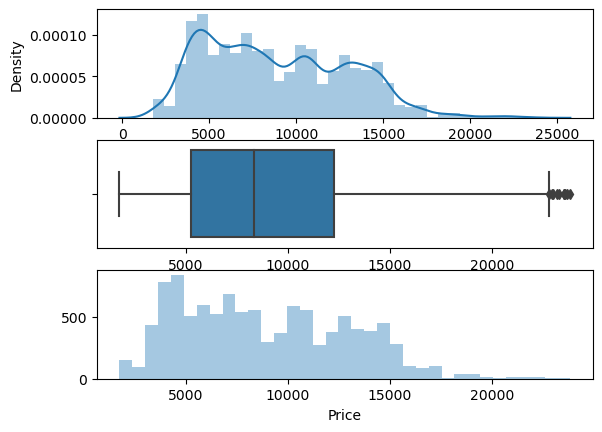

In [694]:
data['Price'] = np.where(data['Price']> 24000, data['Price'].median(), data['Price']) 
#only dealing with upper outliers since lower outlier is negative
plot(data, 'Price') #Now, skewing has decreased as outliers have been replaced

In [695]:
#Now, let's perform feature selection
#Here the dependent feature/target feature is the Price
#Rest all the features are independent features
#Feature selection is all about selecting the best features that have the capacity to contribute the most towards predicting
#the target variable
#Use mutual information approach - whether two random variables are related or not, this measures the dependency between two RVs
#If mutual info is 0, both the features are completely independent. if mutual info is close to 1, both the features are related
y = data['Price']
X = data.drop(['Price'], axis = 1)#we will not update the dataframe, as a result we will not put inplace = True


In [696]:
from sklearn.feature_selection import mutual_info_regression
impArray = mutual_info_regression(X, y)
impArray

array([0.96990356, 0.99822046, 0.79514471, 0.18779025, 0.2307907 ,
       0.40384433, 0.35198746, 0.3306601 , 0.25362126, 0.46817883,
       0.33572972, 0.19501998, 0.20105834, 0.19680846, 0.19426365,
       0.19593168])

In [697]:
impDataFrame = pd.DataFrame(impArray, index = X.columns)
impDataFrame.columns = ['Importance']

In [698]:
impDataFrame.sort_values(by = 'Importance', ascending = False)

,Importance
Destination,0.998220
Airline,0.969904
Total_Stops,0.795145
Duration_Hours,0.468179
Arrival_Time_Hour,0.403844
Arrival_Time_Minute,0.351987
Duration_Minutes,0.335730
Dep_Time_Hour,0.330660
Dep_Time_Minute,0.253621
Journey_Month,0.230791


In [705]:
#Let's now build the model and save the model
#How to build model? We need training and testing data. Training data is that data from which the ML model will learn some 
#kind of relationship in the data. Then, we will apply the ML model on the testing data to get predictions and evaluate
#how well the ML algo is performing
#ML is split into 3 levels: classification, regression, and clustering
#Regression questions: can you predict the price of an airline? rating of a zomato? revenue that a company is going
#to make on a day?
#Classification: can you predict whether a person is diabetic or not? is a restaurant listed on zomato going to be successful
#or not?
#clustering: can you create a cluster of pupils who have the same intentions?
#Mostly, 75% data is considering training, 25% is considered testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
#test_size = 25% of data is test data, random_state means X and y will be divided into training and testing data randomly


In [707]:
from sklearn.ensemble import RandomForestRegressor
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train) #you always put it on the training data
y_pred = ml_model.predict(X_test)
y_pred

array([16747.04,  6333.84,  8872.07, ...,  3538.35,  6407.04,  7037.03])

In [708]:
from sklearn import metrics #leverage R2 score
metrics.r2_score(y_test, y_pred) #accuracy of model is about 80%


0.8001543494388222

In [710]:
#Saving the model: use pickle package
import pickle

In [712]:
file = open(r'rf_random.pkl','wb')
pickle.dump(ml_model, file)
model = open(r'rf_random.pkl','rb')
forest = pickle.load(model)
y_pred2 = forest.predict(X_test)

In [713]:
metrics.r2_score(y_test, y_pred2)

0.8001543494388222

In [716]:

#How to define evaluation metric: MAPE (mean absolute percentage error) (error = actual value-predicted value)
#If there is a repetition in the model, we should always automate it
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [717]:
mape(y_test, y_pred)

13.273229910867034

In [ ]:
from sklearn import metrics

In [723]:
#How to automate machine learning pipeline
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are: {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('RMSE: {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE:{}'.format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score: 0.9461622971510673
Predictions are: [16697.83  6425.25  8873.12 ...  3535.28  6185.73  6906.8 ]


r2 score: 0.8002735218838328
MAE: 1160.8934574951963
RMSE: 3273812.3732940983
RMSE: 1809.3679485649398
MAPE:13.219622527592373


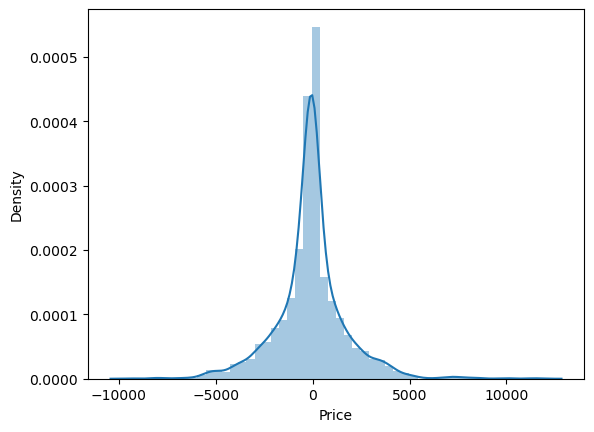

In [725]:
predict(RandomForestRegressor())
#For most instances, the ML work is working pretty good

Training score: 0.9621649023789911
Predictions are: [16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score: 0.67827036211408
MAE: 1338.4881442655685
RMSE: 5273624.605515413
RMSE: 2296.4373724348357
MAPE:15.09676024285302


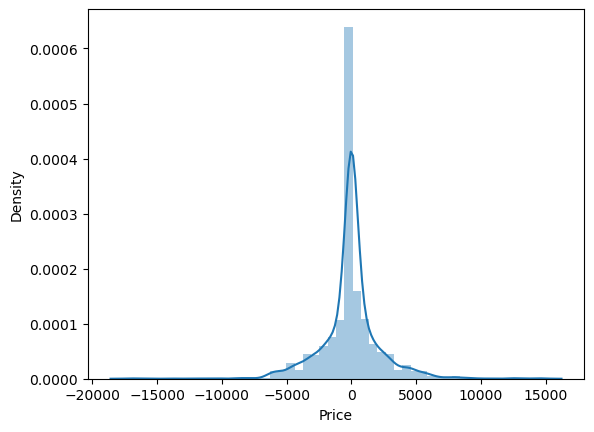

In [727]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

In [728]:
#How to hypertune ML model: tune an ML model in such a way that it returns the optimized values of the hyperparameters of 
#model. Hypertuning is also called hyperparameter optimization. Hypertuning approach is:
#first choose the ML model that you want to hypertune. 
#then, create a dictionary of the hyperparameters to store the data in the form of key, value pairs (where key is the parameter)
#and values are all the possible values of the hyperparameter
#by using the hyperparameter search, do a basic search/basic fitting on top of the training data so that we use the best/optimized
#hyperparameters. As a result, we will get the best scores
from sklearn.model_selection import RandomizedSearchCV


In [730]:
np.linspace(start = 100, stop = 1200, num = 6)#returns evenly spaced numbers over a specified interval. Here, 6 numbers
#between 100 and 1200

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [732]:
regressionRF = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_features = ["auto", "sqrt", "log2"]#max number of features to consider at every split: possible values are auto, log2, sqrt
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)] #default value is none
min_samples_split = [5,10,15,100]

In [733]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split 
}
print(random_grid)

{'n_estimators': [100, 320, 540, 760, 980, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 13, 21, 30], 'min_samples_split': [5, 10, 15, 100]}


In [736]:
#Initialize randomized search CV
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regressionRF, param_distributions = random_grid, cv = 3, n_jobs = -1, verbose = 2) 
#default value of cv = 3. n_jobs will prevent this from running the course of the CPU, verbose determines how code will be executed


In [737]:
rf_random.fit(X_train, y_train)
#We have 6 n_estimators, 3 max_features, 4 max_depth, 4 min_samples_Split, and cv = 3. so total number of iterations will be:
#6*3*4*4*3 = 864 iterations

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [738]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [741]:
rf_random.best_estimator_#this will give us the best optimized model

RandomForestRegressor(max_depth=21, min_samples_split=15, n_estimators=540)

In [742]:
rf_random.best_score_#we could use around 80% accuracy ~ R2_score

0.8046672600251458